#**Importações:**

---



**Plotly.graph_objects:** *biblioteca do Plotly que permite criar visualizações de dados interativas e personalizadas, usando objetos gráficos como figuras, traçados, subplots e anotações.*

**Plotly.express:** *biblioteca de alto nível do Plotly que oferece uma interface simplificada para criar gráficos comuns como scatter plots, line plots, bar plots, histogramas, heatmaps e outros.*

**Numpy:** *biblioteca para computação numérica em Python, com funções para trabalhar com arrays multidimensionais, álgebra linear, operações matemáticas, randomização e outras operações numéricas.*

**Sklearn.preprocessing (StandardScaler):** *classe do Scikit-learn que permite pré-processar dados numéricos para ajustá-los à escala e distribuição adequadas para um modelo de aprendizado de máquina. A classe StandardScaler realiza a padronização dos dados, subtraindo a média e dividindo pelo desvio padrão.*

**Pandas:** *biblioteca para análise de dados em Python, com funções para trabalhar com estruturas de dados como DataFrames e Series, além de manipulação, agregação, seleção, filtragem e transformação de dados.*

**Sklearn.cluster (KMeans):** *classe do Scikit-learn para clustering, um método de aprendizado de máquina não supervisionado que agrupa dados em clusters com base na similaridade entre eles. A classe KMeans implementa o algoritmo de clustering K-Means, que divide o conjunto de dados em K clusters, minimizando a soma das distâncias quadráticas entre cada ponto e o centróide do seu respectivo cluster.* 

**Seaborn:** *É uma biblioteca de visualização de dados em Python baseada no Matplotlib, mas com uma sintaxe mais simplificada e mais atrativa visualmente. Ele oferece diversas funções para criar gráficos estatísticos, como histogramas, gráficos de densidade, scatter plots, heatmaps, entre outros, além de possuir recursos avançados para visualização de distribuições, relações entre variáveis e ajuste de modelos. Com o Seaborn, é possível criar visualizações de dados atraentes e informativas de forma rápida e eficiente.*

In [ ]:
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns

#*Extração dos Dados*


*Este projeto utiliza uma base de dados fornecida pelo professor para fins de análise e clusterização.
Para acessar os dados, utilizamos as bibliotecas pandas, que nos permitem ler e manipular arquivos de dados com facilidade. As informações são armazenadas em um dataframe, que é uma estrutura de dados tabular semelhante a uma planilha, composta por linhas e colunas.*

In [ ]:
df = pd.read_csv('/content/credit_card_clients.csv')



#**Análise Exploratória dos Dados (E.D.A)**

*Nessa etapa, vamos realizar uma Análise Exploratória dos Dados (EDA) para entender melhor a base de dados fornecida pelo professor. É importante ressaltar que, para aplicar técnicas de clusterização, é fundamental entendermos a natureza dos dados e identificarmos possíveis problemas e oportunidades de melhoria.*

*A EDA pode parecer simples em um primeiro contato, mas é uma etapa crucial para garantir que estamos utilizando a técnica mais adequada para o nosso caso específico. Cada base de dados possui suas particularidades e desafios únicos, e a EDA nos ajuda a identificar as melhores estratégias para lidar com essas questões.*

*Durante a EDA, podemos explorar a distribuição dos dados, identificar a presença de outliers, analisar a correlação entre as variáveis, entre outras técnicas. Isso nos permite ter uma compreensão mais profunda da base de dados e tomar decisões mais informadas na etapa de pré-processamento.*

*Em resumo, a Análise Exploratória dos Dados é uma etapa fundamental para o sucesso de qualquer projeto de clusterização. Por meio dela, podemos entender melhor os dados que estamos trabalhando e selecionar as melhores técnicas para extrair informações úteis a partir da base de dados.*

In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,...,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,82,3,8,5,57,12,12,12,12,11,...,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [ ]:
df.shape

(30001, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Index: 30001 entries, ID to 30000

Data columns (total 24 columns):

 #   Column  Non-Null Count  Dtype 

---  ------  --------------  ----- 

 0   X1      30001 non-null  object

 1   X2      30001 non-null  object

 2   X3      30001 non-null  object

 3   X4      30001 non-null  object

 4   X5      30001 non-null  object

 5   X6      30001 non-null  object

 6   X7      30001 non-null  object

 7   X8      30001 non-null  object

 8   X9      30001 non-null  object

 9   X10     30001 non-null  object

 10  X11     30001 non-null  object

 11  X12     30001 non-null  object

 12  X13     30001 non-null  object

 13  X14     30001 non-null  object

 14  X15     30001 non-null  object

 15  X16     30001 non-null  object

 16  X17     30001 non-null  object

 17  X18     30001 non-null  object

 18  X19     30001 non-null  object

 19  X20     30001 non-null  object

 20  X21     30001 non-null  object

 21  X22     30001 non-null  object

 22 

In [ ]:
df.head(5)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [ ]:
df= df.iloc[1:] # percebemos que  tinha mais uma features  sendo utilizada de amostra, então tiramos

<Axes: xlabel='X1', ylabel='Count'>

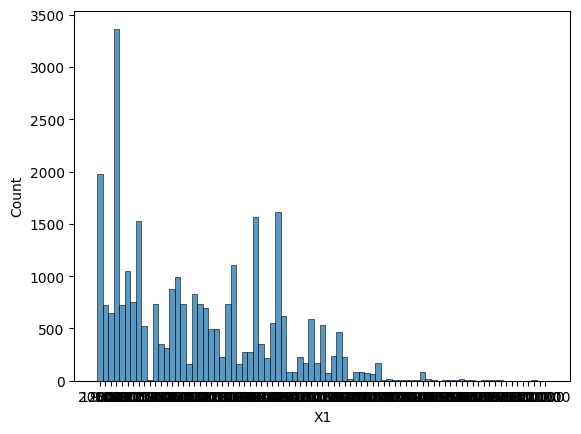

In [ ]:
'''A abordagem será analisar Limit_bal com a educação'''

sns.histplot(df['X1']) # histograma da variável






<Axes: xlabel='X1', ylabel='Density'>

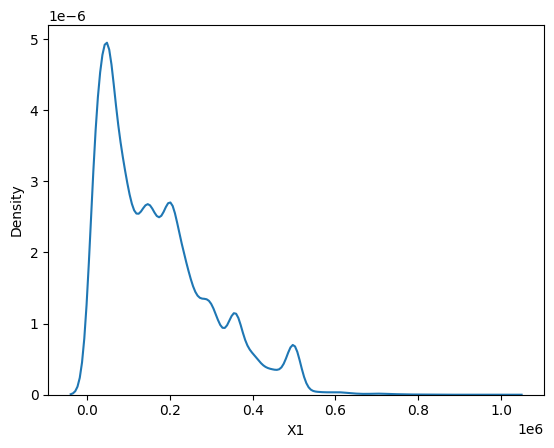

In [ ]:
sns.kdeplot(df['X1'].astype(int)) # plot da densidade da variável

<Axes: xlabel='X3', ylabel='Count'>

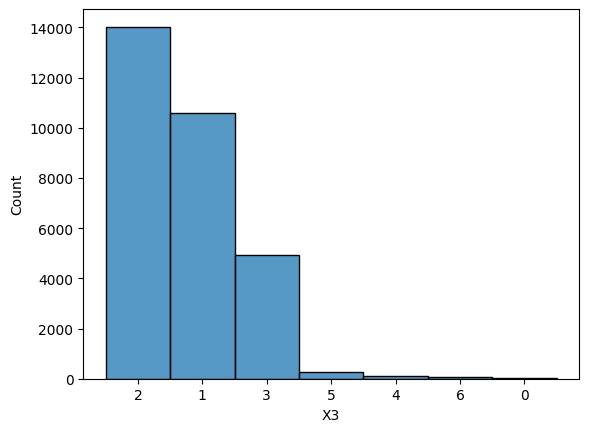

In [ ]:
sns.histplot(df['X3']) # histograma da variável

<Axes: xlabel='X3', ylabel='Density'>

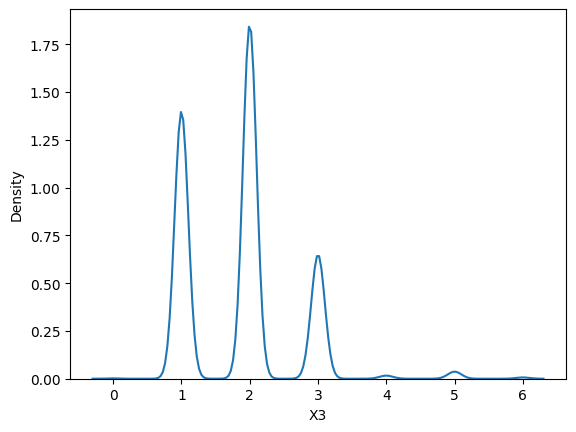

In [ ]:
sns.kdeplot(df['X3'].astype(int)) # plot da densidade da variável

In [ ]:
corr = df['X1'].astype(int).corr(df['X3'].astype(int))
print('Coeficiente de correlação:', corr)
print('Isso significa que, quando o valor de uma variável aumenta, o valor da outra variável tende a diminuir, mas essa relação não é forte.')


Coeficiente de correlação: -0.2191606982292123

Isso significa que, quando o valor de uma variável aumenta, o valor da outra variável tende a diminuir, mas essa relação não é forte.


<Axes: >

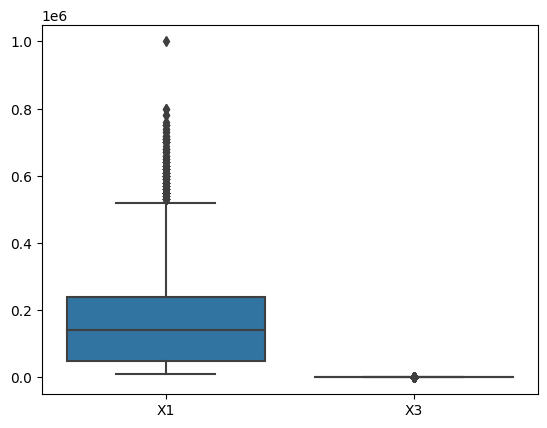

In [ ]:
'''O gráfico gerado mostrará os boxplots para cada coluna,
 onde qualquer valor que esteja fora do limite superior 
 ou inferior do boxplot é considerado um outlier.'''

sns.boxplot(data=df[['X1', 'X3']].astype(int))

In [ ]:
x = df['X1'].astype(int)
y = df['X3'].astype(int)

In [ ]:
grafico = px.scatter(x = x, y = y)
grafico.show()

#**pré-processamento de dados** 

*É uma etapa essencial em qualquer projeto de mineração de dados, incluindo a clusterização. O objetivo do pré-processamento é preparar os dados brutos para serem utilizados em algoritmos de aprendizado de máquina, removendo informações redundantes, corrigindo dados faltantes, normalizando e padronizando os dados.*

***Algumas técnicas comuns de pré-processamento de dados utilizadas em clusterização incluem:***

**Tratamento de valores faltantes:** quando há valores faltantes nos dados, eles podem ser preenchidos com uma estimativa baseada em outras amostras ou eliminados completamente*.

**Detecção e remoção de outliers:** *outliers podem afetar significativamente a clusterização, por isso é importante detectá-los e removê-los para evitar que distorçam os resultados.*

**Normalização e padronização dos dados:** *técnicas como a normalização z-score e min-max scaling podem ser aplicadas para colocar os dados em uma escala comum e evitar que características com valores maiores dominem a clusterização.*

**Redução de dimensionalidade:** *quando há muitas variáveis ou características nos dados, a clusterização pode ser afetada pela maldição da dimensionalidade. Técnicas como a Análise de Componentes Principais (PCA) podem ser usadas para reduzir a dimensionalidade dos dados.*

**Seleção de características:** *selecionar apenas as características mais importantes dos dados pode melhorar a qualidade da clusterização e reduzir o tempo de processamento.*

Ao realizar um pré-processamento adequado, é possível melhorar a qualidade da clusterização e obter insights mais precisos e úteis a partir dos dados.:

In [ ]:
#Tratamento de valores faltantes: sem dados faltantes

print('Total de Amostra de x:',x.count())

num_nulls = x.isnull().sum()
print('Total de Dados Faltantes de x:',num_nulls)

print('Total de Amostra de y:',y.count())

num_nulls = x.isnull().sum()

print('Total de Dados Faltantes de y:',num_nulls)

Total de Amostra de x: 30000

Total de Dados Faltantes de x: 0

Total de Amostra de y: 30000

Total de Dados Faltantes de y: 0


In [ ]:
x.astype(float)
y.astype(float)

x = pd.to_numeric(x, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

print('valores nullos em x:',x.isna().sum())
print('valores nullos em y:',y.isna().sum())

valores nullos em x: 0

valores nullos em y: 0


In [ ]:
#Detecção e remoção de outliers: 


'''Este é apenas um exemplo simples de detecção e remoção de outliers em uma série usando a regra dos 3 sigmas.'''


# criando uma máscara booleana para detectar outliers em x e y
mean_x = x.mean()
std_x = x.std()
lower_limit_x = mean_x - 3*std_x
upper_limit_x = mean_x + 3*std_x
mask_x = (x < lower_limit_x) | (x > upper_limit_x)

mean_y = y.mean()
std_y = y.std()
lower_limit_y = mean_y - 3*std_y
upper_limit_y = mean_y + 3*std_y
mask_y = (y < lower_limit_y) | (y > upper_limit_y)

# removendo os outliers de x e y simultaneamente
mask = np.logical_not(mask_x | mask_y)
x= x[mask]
y = y[mask]

# agora x_clean e y_clean tem os mesmos valores e na mesma ordem

In [ ]:
# Normalização e padronização dos dados:

'''O .T no final transpõe a matriz, 
de forma que a primeira coluna do DataFrame se torna a primeira coluna do array
e a segunda coluna do DataFrame se torna a segunda coluna do array.'''

base_salario = np.array([x.values, y.values]).T

base_salario

array([[ 20000,      2],
       [120000,      2],
       [ 90000,      2],
       ...,
       [ 30000,      2],
       [ 80000,      3],
       [ 50000,      2]])

Visualizando se as ordem dos index foram afetadas pela remoção dos outliers e ruídos



``` 
#df.head(-1)
```



```
# df = pd.concat([x, y], axis=1)

df.head(-1)
```



#Modelagem 
*Na clusterização envolve a escolha de um algoritmo de clusterização, definição de um número de clusters adequado, seleção de recursos relevantes e, em seguida, treinamento do modelo e avaliação de sua eficácia.*


*K-means é um algoritmo de clustering amplamente utilizado na modelagem de dados para identificar grupos ou clusters de objetos semelhantes.*

In [ ]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

In [ ]:
kmeans_salario = KMeans(n_clusters=3)
kmeans_salario.fit(base_salario)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:



The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning




KMeans(n_clusters=3)

In [ ]:
centroides = kmeans_salario.cluster_centers_
centroides

array([[-0.50370155,  0.67390629],
       [ 1.59712469, -0.37743541],
       [-0.19631584, -1.15045753]])

In [ ]:
scaler_salario.inverse_transform(kmeans_salario.cluster_centers_)

array([[1.01849318e+05, 2.29722170e+00],
       [3.67052245e+05, 1.54865632e+00],
       [1.40652903e+05, 9.98257139e-01]])

In [ ]:
rotulos = kmeans_salario.labels_
rotulos

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
grafico1 = px.scatter(x = base_salario[:,0], y = base_salario[:, 1], color = rotulos)
grafico2 = px.scatter(x = centroides[:,0], y = centroides[:, 1], size = [12,12,12])
grafico3 = go.Figure(data = grafico1.data + grafico2.data)
grafico3.show()

In [ ]:
df = pd.concat([x, y], axis=1)

df['cluster'] = rotulos

In [ ]:


df['cluster'].value_counts()

df['cluster'] = df['cluster'].replace({0: 'A', 1: 'B', 2: 'C'})

df = df.rename(columns={'cluster': 'Rotulos'})

df.head(10)

,X1,X3,Rotulos
1,20000,2,A
2,120000,2,A
3,90000,2,A
4,50000,2,A
5,50000,2,A
6,50000,1,C
7,500000,1,B
8,100000,2,A
9,140000,3,A
10,20000,3,A
